In [23]:
import sys
import os
import SimpleITK as sitk
import pandas
import matplotlib.pyplot as plt
import scipy.ndimage
import numpy as np
import tensorflow as tf
from random import randint
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
csvPath = 'C:\\Users\\polch\\Documents\\LUNA\\CSVFILES\\annotations.csv'
#nodules = pandas.read_csv(csvPath)
imagePath = 'C:\\Users\\polch\\Documents\\LUNA\\subset0\\'
maskPath = 'C:\\Users\\polch\\Documents\\LUNA\\seg-lungs-LUNA16\\'
image0 = '1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059.mhd'
image1 = '1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492.mhd'

Image spacing: (0.5488280057907104, 0.5488280057907104, 1.25)

Printing slice 36 out of 161
Image shape: (512, 512)


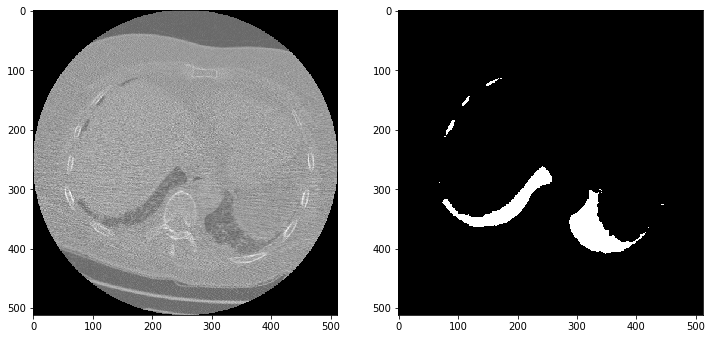

Printing slice 112 out of 161
Image shape: (512, 512)


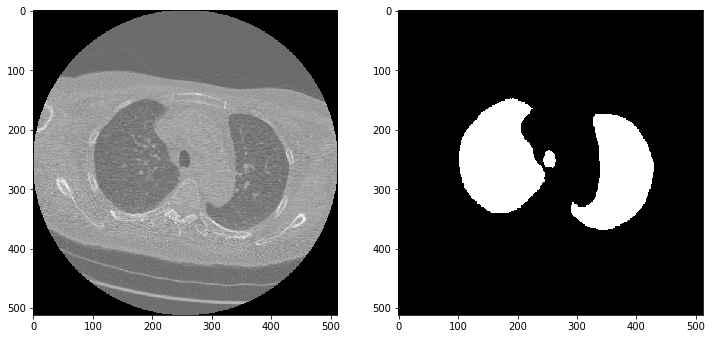

In [16]:
##################################
# Getting the image and its mask #
##################################
image_ = sitk.ReadImage(imagePath + image0)
mask_ = sitk.ReadImage(maskPath + image0)
print('Image spacing:', image_.GetSpacing())
imageNP = sitk.GetArrayViewFromImage(image_)
maskNP = sitk.GetArrayViewFromImage(mask_)
# We rescale to only zeros and ones
maskNP = (maskNP > 0).astype(int)
#print('imageNP.shape:',imageNP.shape)
#print('imageNP[123, :, :]:', imageNP[123, :, :])

###################################
# Printing the slice and its mask #
###################################
slice = randint(0, imageNP.shape[0])
print('\nPrinting slice', slice, 'out of', imageNP.shape[0])
print('Image shape:',imageNP[slice, :, :].shape)
plt.figure(1, figsize = (12, 12))
plt.subplot(121)
plt.imshow(imageNP[slice, :, :], cmap = 'gray')
plt.subplot(122)
plt.imshow(maskNP[slice, :, :], cmap = 'gray')
plt.show()

slice = randint(0, imageNP.shape[0])
print('Printing slice', slice, 'out of', imageNP.shape[0])
print('Image shape:',imageNP[slice, :, :].shape)
plt.figure(2, figsize = (12, 12))
plt.subplot(121)
plt.imshow(imageNP[slice, :, :], cmap = 'gray')
plt.subplot(122)
plt.imshow(maskNP[slice, :, :], cmap = 'gray')
plt.show()


In [1]:
patients = []
# r=root, d=directories, f = files
for r, d, f in os.walk(imagePath):
    for file in f:
        if '.mhd' in file:
            patients.append(os.path.join(r, file))
images = []
masks = []
for path in patients:
    print('path:', path)
    images.append(sitk.ReadImage(path))
    masks.append(sitk.ReadImage(path.replace('subset0', 'seg-lungs-LUNA16')))
print(images)

NameError: name 'os' is not defined

In [25]:
def resample(image, spacing, new_spacing=[1, 1, 1], method = 'linear'):
    """
    Resample image given spacing (in mm) to new_spacing (in mm).
    """
    spacing = np.array(list(spacing))

    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor

    if method == 'cubic':
        image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, order=3)
    elif method == 'quadratic':
        image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, order=2)
    elif method == 'linear':
        image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, order=1)
    elif method == 'nearest':
        image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, order=0)
    else:
        raise NotImplementedError("Interpolation method not implemented.")

    return image, new_spacing

In [35]:
image_0 = sitk.ReadImage(imagePath + image0)
mask_0 = sitk.ReadImage(maskPath + image0)
image_1 = sitk.ReadImage(imagePath + image1)
mask_1 = sitk.ReadImage(maskPath + image1)
imageNP0 = sitk.GetArrayViewFromImage(image_0)
maskNP0 = sitk.GetArrayViewFromImage(mask_0)
imageNP1 = sitk.GetArrayViewFromImage(image_1)
maskNP1 = sitk.GetArrayViewFromImage(mask_1)
# We rescale to only zeros and ones
maskNP0 = (maskNP0 > 0).astype(int)
maskNP1 = (maskNP1 > 0).astype(int)

x_train = [resample(imageNP0, image_0.GetSpacing()), resample(imageNP1, image_1.GetSpacing())]
y_train = [resample(maskNP0, mask_0.GetSpacing()), resample(maskNP1, mask_1.GetSpacing())]
#x_train = resample(imageNP0, image_0.GetSpacing())
#y_train = resample(maskNP0, mask_0.GetSpacing())

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen2 = ImageDataGenerator()

#for returned in datagen2.flow(x_train, y_train, batch_size=32):
for x_batch, y_batch in datagen2.flow(x_train, y_train, batch_size=32):
    print(returned.shape)

ValueError: setting an array element with a sequence.